# Estimation statistique avancée
# Adrien HANS & Tanguy JEANNEAU
## Simulations de Variables Aléatoires


In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

On peut calculer les moyennes empiriques/variances.... 

## 1 : A partir de l’inverse généralisée de la fonction de répartition

Ici, la fonction de répartition de X est égale à : 

\begin{align*}
F(x) = 1 - exp(-\lambda x)
\end{align*}

1) Après calcul, l'inverse généralisée de F est égale à  : 
\begin{align*}
F^{-1}(u) = - \frac{ln(1-u)}{\lambda}
\end{align*}

2) On utilise la méthode de l'inverse généralisée pour simuler 10 000 échantillons issus d'une loi exponentielle avec $\lambda = 2$. 

In [29]:
Lambda=2
nbEchantillon = 10000
U=uniform.rvs(loc=0.0,scale=1.0,size=nbEchantillon)
X=(-1/Lambda)*np.log(1-U)

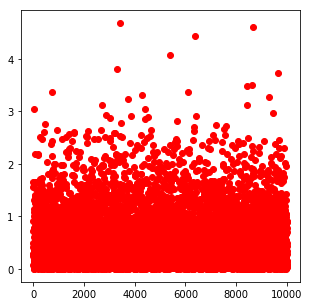

In [32]:
#On affiche le résultat: 
fig=plt.figure(figsize=(5,5))
plt.scatter(np.arange(0,10000),X,color='r')
plt.show()

3) On trace sur une autre figure la courbe de densité de probabilité normalisée de X :

In [6]:
x_dens=np.arange(0,5,0.01)
densite_X=Lambda*np.exp(-Lambda*x_dens)

<Figure size 432x288 with 0 Axes>

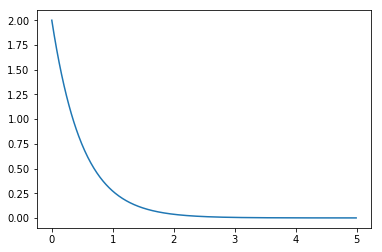

In [7]:
fig=plt.figure()
plt.plot(x_dens,densite_X)
plt.show()

4) On trace l'histogramme normalisé des échantillons de la première question.

C:\Users\adrien\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


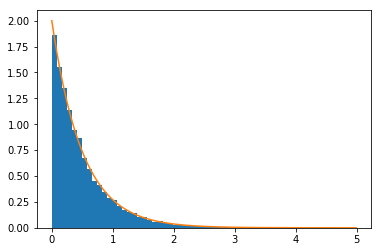

In [8]:
plt.hist(X,bins=50,normed=True)
plt.plot(x_dens,densite_X)
plt.show()

**On peut calculer certaines propriétés des 10 000 échantillons précédemment simulés : **

In [9]:
print('Moyenne Empirique :' , np.mean(X))
print('Variance Empirique :' , np.var(X))

Moyenne Empirique : 0.496315160459
Variance Empirique : 0.246113385345


5) Principale limitation de cette méthode : 
- Il faut connaitre l'inverse généralisée de F pour pouvoir générer les nombres aléatoires. 

## 5 : Echantilloner suivant une loi de Bernoulli : 
1) On génère 1000 échantillons suivant une loi de Bernoulli de paramètre p=0.7 puis on trace le résultat : 

In [23]:
p=0.7
nbEchantillon = 1000
#On génère 1000 nombres pseudo-aléatoires uniforme entre 0 et 1 : 
U=uniform.rvs(loc=0.0,scale=1.0,size=nbEchantillon)
X=[]
for u in U:
    if u<p:
        X.append(0)
    else:
        X.append(1)

Etant donné la nature de l'échantillon, l'affichage le plus adapté est l'histogramme : 

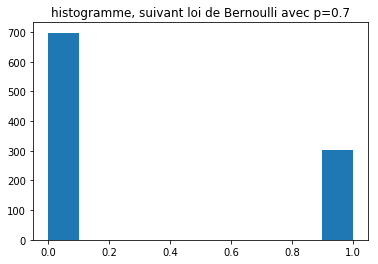

In [24]:
fig=plt.figure()
plt.hist(X)
plt.title('histogramme, suivant loi de Bernoulli avec p=0.7')
plt.show()

2) On calcule la fréquence du nombre de zéros générés : 

In [26]:
print('fréquence du nombre de zéros générés : ' , X.count(0)/nbEchantillon)

fréquence du nombre de zéros générés :  0.698


In [27]:
print('Moyenne empirique : ', np.mean(X))
print('Variance empirique : ', np.var(X))

Moyenne empirique :  0.302
Variance empirique :  0.210796


On retrouve le paramètre de la loi de Bernoulli à $10^{-3}$ près. 

##  6) Les méthodes Monte Carlo Markov Chain : MCMC